In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [ ]:
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sentiment140:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2477%2F4140%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240330%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240330T150422Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0842ccfd3a9cc786147d39a3856a39e572939a02cc887e3747d7f573d2111e0e63f1b8bc175480369fe6cec69f4de6859f32c350ac9b6d8d6c4299010fb5a453f2407e708d6df796fdfb009b949cb369d27648a0504dad5b5f27ab781ebb3b55582b5c9fc3b493bfb22147cc08ee490ea48ec9faa66a765d7326279228de7e0753d8d5237662d4555af24a3a5fb4d5efd939382612b5b6f8988eeec0e267d395e2b38a02e85182bad39435534003b7cb70af907c04eb912f92cd4753779482ea0189d78e21b6e48fa63d0b6378f0a9938437ece674ca5622a955fe55585341c23bd672d535a3dc3df4d14af990650dfe89ff68003d92580b4fa47357146f163b'

In [ ]:
KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

In [ ]:
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

In [ ]:
try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 84855679 bytes downloaded
Downloaded and uncompressed: sentiment140
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [ ]:
%%capture
!pip install tensorflow keras_cv --upgrade --quiet

In [ ]:
%%capture
!pip install pycocotools

In [ ]:
%%capture
!pip install --upgrade keras-cv

In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 5536s 107s/step
198180272/198180272 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


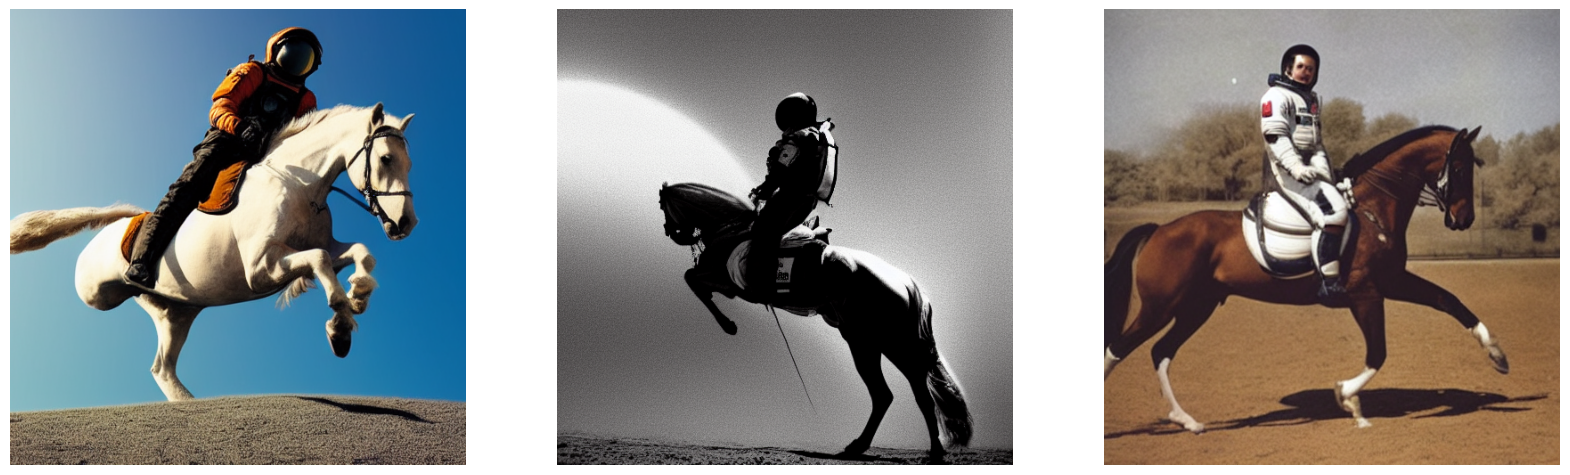

In [ ]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

In [ ]:
images = model.text_to_image("photograph of an astronaut in a dark alley with purple lights", batch_size=4)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

17/50 ━━━━━━━━━━━━━━━━━━━━ 1:16:10 138s/step

In [ ]:
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', header=None, encoding='ISO-8859-1',
                   names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [ ]:
data.head(2)

In [ ]:
data = data[["target","text"]]
data.sample(5)

In [ ]:
data.target = data['target'].replace(4,1)

In [ ]:
data['target'].value_counts()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Visualizing the distribution of the target variable

sentiment= {0:'Negative', 1:'Positive'}
print(data['target'].apply(lambda x: sentiment[x]).value_counts())
data['target'].apply(lambda x: sentiment[x]).value_counts().plot(kind='bar')
plt.show()

In [ ]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# To add a new column with the sentiment classification
data["sentiment"] = data["text"].apply(get_sentiment)

# To print the number of texts in each category
print("Sentiment Distribution:\n", data["sentiment"].value_counts())

# To print 10 text from each category
print("\nPositive text:")
print(data[data["sentiment"] == "Positive"]["text"].head(10))
print("\nNegative text:")
print(data[data["sentiment"] == "Negative"]["text"].head(10))
print("\nNeutral text:")
print(data[data["sentiment"] == "Neutral"]["text"].head(10))

# To visualize the distribution of sentiment
sns.countplot(x="sentiment", data=data)


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_tweet(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove mentions
    text = re.sub(r'#', '', text) # Remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word.lower()) for word in text.split() if word.lower() not in stop_words]) # Tokenize, lemmatize, and remove stop words
    return text

In [ ]:
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [ ]:
data['text'] = data['text'].apply(preprocess_tweet)

In [ ]:
data['text']

In [ ]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
train_features = vectorizer.fit_transform(train_data['text'])
test_features = vectorizer.transform(test_data['text'])

In [ ]:
# Train a classifier
clf = MultinomialNB()
clf.fit(train_features, train_data['target'])

In [ ]:
# Text generation
def generate_tweet(seed_sentence, n=10):
    current_sentence = seed_sentence
    perplexity = 0
    for i in range(n):
        vectorized_sentence = vectorizer.transform([current_sentence])
        prediction = clf.predict(vectorized_sentence)[0]
        if prediction == 0:
            next_word = np.random.choice(train_data[train_data['target'] == 0]['text'])
        else:
            next_word = np.random.choice(train_data[train_data['target'] == 4]['text'])
        current_sentence += ' ' + next_word

        # Calculate perplexity
        prob = clf.predict_proba(vectorized_sentence)
        perplexity += math.log(prob[0][prediction])

    # Calculate average perplexity
    avg_perplexity = math.exp(-perplexity/n)
    return current_sentence, avg_perplexity

In [ ]:
import math
# Example usage
seed_sentence = "I am feeling"
generated_tweet, perplexity = generate_tweet(seed_sentence)
print("Generated tweet: ", generated_tweet)
print("Perplexity score: ", perplexity)

In [ ]:
import seaborn as sns
%matplotlib inline
from skimage.io import imread, imshow, imsave
import cv2 # opencv version 3.4.2
from skimage.filters import prewitt_h,prewitt_v
from skimage.color import rgb2hsv
import scipy.misc
import scipy.ndimage
import sklearn.metrics
from sklearn.cluster import KMeans
import matplotlib as mpl
from skimage import measure
import imageio
import os

In [ ]:
import skimage
import skimage.io

test_img_f = '../input/open-images-2019-object-detection/test/0004fdbc5b94c7c2.jpg'
im = skimage.io.imread(test_img_f)
im_g = skimage.io.imread(test_img_f, as_gray=True)

#skimage.io.imshow(im)
im.dtype

In [ ]:
image = imread('../input/open-images-2019-object-detection/test/0004fdbc5b94c7c2.jpg', as_gray=True)
imshow(image)
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))

In [ ]:
image = imread('../input/open-images-2019-object-detection/test/0004fdbc5b94c7c2.jpg')
print('Type of the image : ' , type(image))

print('Shape of the image : {}'.format(image.shape))

print('Image Hight {}'.format(image.shape[0]))

print('Image Width {}'.format(image.shape[1]))

print('Dimension of Image {}'.format(image.ndim))

In [ ]:
image = imread('../input/open-images-2019-object-detection/test/0004fdbc5b94c7c2.jpg')
print('Image size {}'.format(image.size))

print('Maximum RGB value in this image {}'.format(image.max()))

print('Minimum RGB value in this image {}'.format(image.min()))

In [ ]:
# RGB to HSV(Hue, Saturation, Value)
inp_image = imread("../input/open-images-2019-object-detection/test/0004fdbc5b94c7c2.jpg")
hsv_img = rgb2hsv(inp_image)
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
imshow(hsv_img)

In [ ]:
grayscale = imread('../input/open-images-2019-object-detection/test/0004fdbc5b94c7c2.jpg')
counts, vals = np.histogram(grayscale, bins=range(2 ** 8))
plt.plot(range(0, (2 ** 8) - 1), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')

In [ ]:
submission=pd.read_csv("/kaggle/input/2023-kaggle-ai-report/sample_submission.csv")
submission.head()

In [ ]:
submission.loc[0]['value']='Generative AI'
submission.loc[1]['value']='https://www.kaggle.com/code/jocelyndumlao/ai-report-generative-ai/'
submission.loc[2]['value']=''
submission.loc[3]['value']=''
submission.loc[4]['value']=''
submission.head()

In [ ]:
submission.to_csv('submission.csv',index = False)